In [68]:
!pip install numpy pandas gensim


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
import gensim
import os

In [70]:
!pip install nltk


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [72]:
print(os.getcwd())
print(os.listdir())

e:\NLP-projects\word-to-vec
['.git', 'data', 'game_of_throne_word=to-vec.ipynb', 'got_word2vec.model', 'README.md', 'word2vec_pca.html']


In [73]:
import os
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

story = []

for filename in os.listdir("data"):
    if filename.endswith(".txt"):
        f = open(os.path.join("data", filename), encoding="cp1252")
        corpus = f.read()
        f.close()

        raw_sent = sent_tokenize(corpus)

        for sent in raw_sent:
            story.append(simple_preprocess(sent))

print(len(story))

145020


Step 1: Train Word2Vec Model

In [74]:
from gensim.models import Word2Vec

model = Word2Vec(
    sentences=story,
    vector_size=100,   # embedding size
    window=5,          # context window
    min_count=2,       # ignore rare words
    workers=4
)

print("Vocabulary size:", len(model.wv))

Vocabulary size: 17453


Step 2: Test the Model

In [75]:
model.wv.most_similar("king")

[('baratheon', 0.6491215229034424),
 ('realm', 0.6431171298027039),
 ('prince', 0.6279104351997375),
 ('throne', 0.6120344400405884),
 ('usurper', 0.5887287855148315),
 ('battle', 0.5814176201820374),
 ('site', 0.5757335424423218),
 ('targaryen', 0.5536675453186035),
 ('lannisters', 0.5441051721572876),
 ('conqueror', 0.5369207262992859)]

In [76]:
model.wv.most_similar("winter")

[('summer', 0.7706930637359619),
 ('woods', 0.7371654510498047),
 ('harrying', 0.730051577091217),
 ('world', 0.7238457202911377),
 ('streets', 0.7229676842689514),
 ('autumn', 0.711823582649231),
 ('ghosts', 0.7107139825820923),
 ('fires', 0.7091089487075806),
 ('river', 0.7085753679275513),
 ('mountains', 0.7079840898513794)]

Step 3: Word Analogy (Cool Part)

In [77]:
model.wv.most_similar(positive=["king", "woman"], negative=["man"])

[('queen', 0.6333052515983582),
 ('prince', 0.5597914457321167),
 ('princess', 0.5408177375793457),
 ('targaryen', 0.5311184525489807),
 ('baratheon', 0.5110772252082825),
 ('traitor', 0.48399633169174194),
 ('realm', 0.4789438843727112),
 ('usurper', 0.4788670539855957),
 ('mother', 0.4787176847457886),
 ('wedding', 0.46647658944129944)]

Step 4: Save Model

In [78]:
model.save("got_word2vec.model")

Load later with:

In [79]:
model = Word2Vec.load("got_word2vec.model")

Optional: Check Vocabulary Words

In [80]:
print(model.wv.index_to_key[:20])

['the', 'and', 'to', 'of', 'he', 'his', 'was', 'you', 'her', 'in', 'it', 'had', 'that', 'she', 'as', 'with', 'him', 'not', 'but', 'for']


In [81]:
model.build_vocab(story)

Train the model

In [82]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(6569699, 8628190)

In [83]:
model.wv.most_similar('daenerys')

[('rhaegar', 0.593071699142456),
 ('joffrey', 0.5847087502479553),
 ('aerys', 0.5808526277542114),
 ('myrcella', 0.5728386640548706),
 ('unburnt', 0.5666190385818481),
 ('aegon', 0.5618920922279358),
 ('quentyn', 0.5473839640617371),
 ('hizdahr', 0.540513277053833),
 ('cersei', 0.5337833762168884),
 ('viserys', 0.5289309024810791)]

In [84]:
model.wv.doesnt_match(['jon','rikon','robb','arya','sansa','bran'])

'jon'

In [85]:
model.wv['king']

array([-0.6931342 , -0.87233937, -3.9712567 ,  0.8425035 , -1.3412269 ,
        0.02900336,  1.3713876 ,  0.7388627 , -2.7276087 , -1.3908671 ,
        1.3022289 ,  0.22054918,  0.18390773, -0.04094185, -0.10297633,
        2.2272193 ,  0.31386292, -1.4079449 ,  0.3879558 , -1.2766494 ,
       -0.28282177, -0.07861299,  1.7407732 ,  0.4012499 ,  3.1941166 ,
       -0.42607677, -1.7630154 , -0.15145698,  0.25214627,  1.3246597 ,
        1.2956971 ,  0.4110668 , -1.4352264 ,  0.7025237 , -1.0408586 ,
        0.95544714,  3.1470153 ,  0.92990094, -0.5146883 , -0.07121897,
        0.08720966, -2.289053  ,  2.722782  , -2.6392128 , -1.0582554 ,
        0.00482292, -1.2064011 ,  3.2191873 , -1.158305  , -0.27661416,
        2.2837338 , -0.32265535,  1.218798  , -0.15055577,  2.024768  ,
        1.1593382 ,  1.4366535 , -0.9166808 ,  3.5888762 ,  1.5783714 ,
        0.1420606 , -1.6567862 ,  2.6748133 ,  2.831993  ,  0.2995202 ,
        0.04268299, -2.080757  ,  1.5851418 ,  0.15090714, -0.35

In [86]:
model.wv.similarity('arya','sansa')

np.float32(0.85116315)

In [87]:
model.wv.get_normed_vectors()

array([[-0.09334917,  0.0592609 ,  0.06993501, ..., -0.11014386,
        -0.16810706, -0.19994228],
       [ 0.20062007,  0.01714171,  0.24808988, ..., -0.19883576,
        -0.02698239,  0.03453038],
       [-0.1466121 ,  0.07363266, -0.13070558, ..., -0.05015734,
         0.04098593, -0.08627046],
       ...,
       [-0.0326929 ,  0.03427537,  0.0457488 , ...,  0.04975252,
        -0.03077686,  0.08744267],
       [ 0.11734034, -0.05290452,  0.05114602, ..., -0.05636508,
        -0.06043727, -0.0342599 ],
       [ 0.02631558,  0.01366003,  0.12343212, ...,  0.05965359,
         0.00498212,  0.05130291]], shape=(17453, 100), dtype=float32)

In [88]:
y = model.wv.index_to_key

In [89]:
!pip install matplotlib scikit-learn


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


It is 100 dimension so i will dimesional reduction using PCA in 3 dimensional

In [90]:
from sklearn.decomposition import PCA

In [91]:
pca = PCA(n_components=3)

In [92]:
X = pca.fit_transform(model.wv.get_normed_vectors())

In [93]:
X.shape

(17453, 3)

In [94]:
!pip install plotly


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [95]:
%pip install --upgrade "nbformat>=4.2.0"

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
from gensim.models import Word2Vec

# assuming you already have:
# model = Word2Vec(...)

# choose how many words to visualize
TOP_N = 200  

words = list(model.wv.index_to_key[:TOP_N])
X = model.wv[words]   # shape: (TOP_N, vector_size)

print("Matrix shape:", X.shape)

Matrix shape: (200, 100)


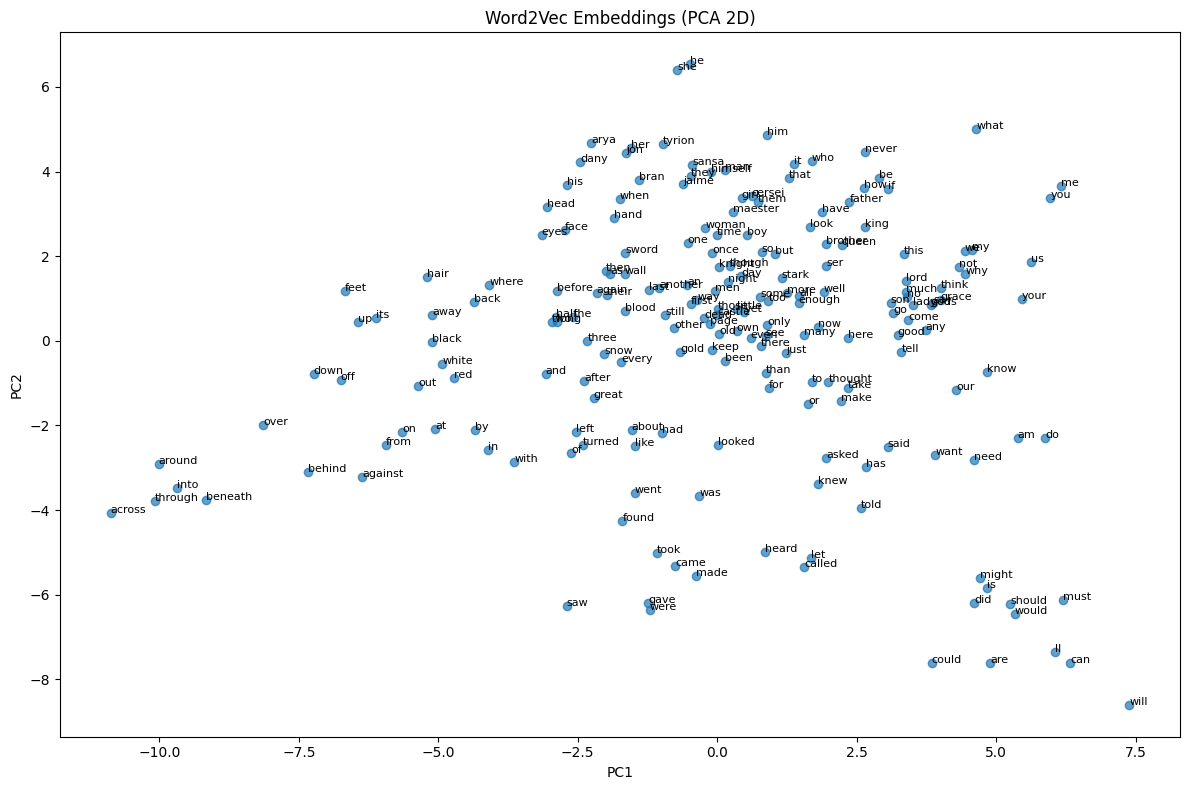

In [97]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]), fontsize=8)

plt.title("Word2Vec Embeddings (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

In [98]:
import pandas as pd
import plotly.express as px

# Create dataframe
df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "word": words
})

In [99]:
fig = px.scatter(
    df,
    x="PC1",
    y="PC2",
    text="word",
    title="Word2Vec Embeddings (PCA 2D)"
)

fig.update_traces(marker=dict(size=6))
fig.update_layout(height=700)

fig.show()

In [100]:
import plotly.io as pio
pio.renderers.default = "browser"

In [101]:
fig.show()

In [102]:
TOP_N = 200

df_small = df.iloc[:TOP_N]

fig = px.scatter(
    df_small,
    x="PC1",
    y="PC2",
    text="word",
    title="Word2Vec Embeddings (PCA 2D)"
)

fig.update_traces(marker=dict(size=6))
fig.show()

In [103]:
import plotly.express as px
import pandas as pd

# you already have: X_pca, words

df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "word": words,
})

# Optional: limit to top 200 words so it’s not too crowded
df_small = df.iloc[:200]

fig = px.scatter(
    df_small,
    x="PC1",
    y="PC2",
    text="word",
    title="Word2Vec Embeddings (PCA 2D)",
)

fig.update_traces(marker=dict(size=6))
fig.update_layout(height=700)

# 🚨 Instead of fig.show():
fig.write_html("word2vec_pca.html")
print("Saved to word2vec_pca.html")

Saved to word2vec_pca.html
